From Year 2 kinetics questions

\begin{equation}
\mathrm{A}\underset{k_{-1}}{\overset{k_1}\leftrightarrows}\mathrm{B}
\end{equation}

\begin{equation}
\mathrm{A}\underset{k_{-2}}{\overset{k_2}\leftrightarrows}\mathrm{C}
\end{equation}


In [23]:
import numpy as np
from scipy.integrate import odeint
import math
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.constants import R

In [24]:
# differential rate equations for [A], [B], and [C]
# cf. year 1 kinetics 
def d_A_by_d_t( k1, km1, k2, km2, c_A, c_B, c_C ):
    return ( - k1  * c_A
             + km1 * c_B
             - k2  * c_A
             + km2 * c_C )

def d_B_by_d_t( k1, km1, c_A, c_B ):
    return ( + k1  * c_A
             - km1 * c_B )

def d_C_by_d_t( k2, km2, c_A, c_C ):
    return ( + k2  * c_A 
             - km2 * c_C )

In [25]:
# combine all the rate equations into a vector function
def dy_by_dt( y, t, k1, km1, k2, km2 ):
    """Return d[X]/dt = f([X]) at time t."""
    c_A, c_B, c_C = y
    dAdt = d_A_by_d_t( k1, km1, k2, km2, c_A, c_B, c_C )
    dBdt = d_B_by_d_t( k1, km1, c_A, c_B )
    dCdt = d_C_by_d_t( k2, km2, c_A, c_C )
    return dAdt, dBdt, dCdt

In [26]:
# combine the concentrations into a vector
# use scipy.integrate.odeint to integrate the rate equations at a series of times
# cf. Learning Scientific Programming with Python [C. Hill]
def solve( c_A0, c_B0, c_C0, k1, km1, k2, km2, times ):
    """Return [A], [B], and [C] at a series of times"""
    y0 = c_A0, c_B0, c_C0
    c_A, c_B, c_C = odeint( dy_by_dt, y0, t, args=( k1, km1, k2, km2 ) ).T
    return c_A, c_B, c_C

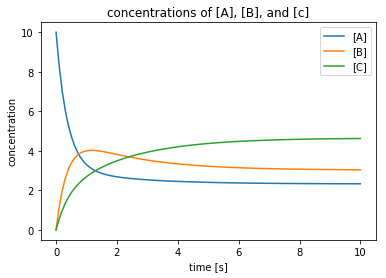

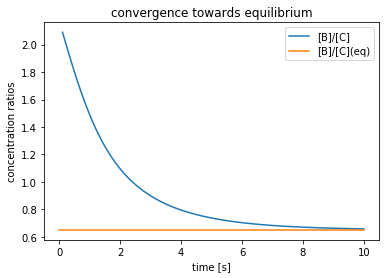

In [27]:
# Example 1. All rates are similar magnitudes. 
# The ratio of products at equilibrium is given by ratios of the component rates.
c_A0 = 10.0
c_B0 = 0.0
c_C0 = 0.0

k1  = 1.3
km1 = 1.0
k2  = 0.6
km2 = 0.3

t = np.linspace( 0, 10, 100 )
c_A, c_B, c_C = solve( c_A0, c_B0, c_C0, k1, km1, k2, km2, t )

plt.plot( t, c_A, label='[A]' )
plt.plot( t, c_B, label='[B]' )
plt.plot( t, c_C, label='[C]' )
plt.legend()
plt.xlabel( 'time [s]' )
plt.ylabel( 'concentration')
plt.title( 'concentrations of [A], [B], and [c]')
plt.show()

c_B_over_c_C_eq = ( k1 / km1 ) / ( k2 / km2 )

plt.plot( t[1:], c_B[1:] / c_C[1:], label='[B]/[C]')
plt.plot( [ 0, t[-1] ], [ c_B_over_c_C_eq, c_B_over_c_C_eq ], label='[B]/[C](eq)' )
plt.legend()
plt.xlabel( 'time [s]' )
plt.ylabel( 'concentration ratios')
plt.title( 'convergence towards equilibrium' )
plt.show()

In [28]:
# Example 2. Rates are very different magnitudes. 
# Depending on the timescale, we first form the kinetic product, then form the thermodynamic product.

c_A0 = 10.0
c_B0 = 0.0
c_C0 = 0.0

k1  = 1.0
km1 = 1.0e-3
k2  = 1.0e-2
km2 = 1.0e-10

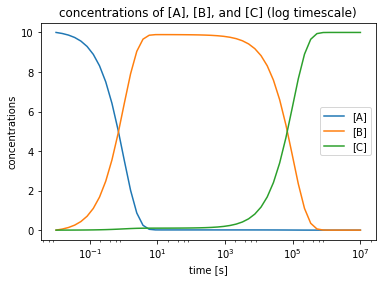

delta G (A to B) = -17.11540756544976 kJ mol^-1
delta G (A to C) = -45.64108684119937 kJ mol^-1


In [29]:
# Use logarithmically space times to get fine resolution at short times (for fast A to B conversion)
# and also cover long total times (for slow A to C conversion)
t = np.logspace( -2, 7 ) 
c_A, c_B, c_C = solve( c_A0, c_B0, c_C0, k1, km1, k2, km2, t )

plt.semilogx( t, c_A, label='[A]' )
plt.semilogx( t, c_B, label='[B]' )
plt.semilogx( t, c_C, label='[C]' )
plt.xlabel( 'time [s]' )
plt.ylabel( 'concentrations')
plt.title( 'concentrations of [A], [B], and [C] (log timescale)' )
plt.legend()
plt.show()

# 10^6 s ≈ 11.6 days.

temp = 298.0

# Can calculate delta G for A → B and A → C using ΔG = -RT log(K), where K_x = k_x / k_minus_x
delta_G_A_to_B = -R * temp * math.log( k1 / km1 ) / 1e3 # kJ mol^-1
delta_G_A_to_C = -R * temp * math.log( k2 / km2 ) / 1e3 # kJ mol^-1
print( "delta G (A to B) =", delta_G_A_to_B, "kJ mol^-1" )
print( "delta G (A to C) =", delta_G_A_to_C, "kJ mol^-1" )